## Natural Language Processing - Summer Term 2023
### Hochschule Karlsruhe
### Lecturer: Prof. Dr. Jannik Strötgen
### Thanks to: Jun.-Prof. Dr. Andreas Spitz and his tutors.
### Assignment by: Maximilian Dürr, Tobias Kühn

# Exercise 02

### You will learn about:

- tokenization
- data cleaning and stop word removal
- stemming
- zipf's law

---

## Task 1 - Tokenization (5 P):

### Part 1

Describe what tokenization is, how it is performed, and what problems it solves.

Tokenization is the process of breaking up a text into smaller units, known as tokens, which could be words, phrases, or other meaningful segments. In natural language processing (NLP), tokenization is a critical preprocessing step for various NLP tasks, including machine translation, sentiment analysis, named entity recognition, and more.

Tokenization can be performed in many ways, depending on the specific requirements of the task at hand. For instance, word tokenization involves splitting the input text into words, while character tokenization splits the input text into individual characters. Other types of tokenization include subword tokenization, which breaks down words into smaller units, and sentence tokenization, which separates the input text into sentences.

Tokenization solves several problems in NLP. First, it helps to normalize the input text by removing unnecessary whitespace and other formatting issues. Second, it enables the efficient processing of large datasets by reducing the overall size of the input. Finally, tokenization makes it easier to apply statistical and machine learning models to NLP tasks since these models often work best with inputs that have been preprocessed in a consistent and standardized way

### Part 2

For the later analysis of each text file, we need to identify single tokens. Therefore, you have to use a library to separate single tokens from the text. We will use the methods offered by `nltk` for this.

In [1]:
import json
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
with open('data/texts.json', 'r') as infile:
    data = json.load(infile)

content_debates = data['debates']
content_reddit = data['reddit']
content_tv = data['tv']

In [4]:
# 1. Tokenize the text content for the three datasets above
# 2. Print the first 20 tokens for each dataset
# 3. Now display the first paragraphs of the corresponding original text and study them.
#    (do _not_ use print(), but just the debug view of jupyter notebook which retains control characters) 

# CODE SUBMISSION ANSWER HERE (Double click to edit)
# EXAMPLE SOLUTION

tokens_debates = nltk.word_tokenize(content_debates)
tokens_reddit = nltk.word_tokenize(content_reddit)
tokens_tv = nltk.word_tokenize(content_tv)

In [5]:
content_debates[0:1000]

' Good evening from Hofstra University in Hempstead, New York. I am Lester Holt, anchor of "NBC Nightly News.” I want to welcome you to the first presidential debate.\nThe participants tonight are Donald Trump and Hillary Clinton. This debate is sponsored by the Commission on Presidential Debates, a nonpartisan, nonprofit organization. The commission drafted tonight\'s format, and the rules have been agreed to by the campaigns.\nThe 90-minute debate is divided into six segments, each 15 minutes long. We\'ll explore three topic areas tonight: Achieving prosperity; America\'s direction; and securing America. At the start of each segment, I will ask the same lead-off question to both candidates, and they will each have up to two minutes to respond. From that point until the end of the segment, we\'ll have an open discussion.\nThe questions are mine and have not been shared with the commission or the campaigns. The audience here in the room has agreed to remain silent so that we can focus 

In [6]:
content_reddit[0:1000]

'**ALL USERS: PLEASE CONSIDER THIS YOUR ONE AND ONLY WARNING**\n\nThis is a reminder that this subreddit has strict posting/commenting rules that will be enforced by moderation. If you are new to this subreddit, please read our sidebar before commenting. \n\n- Don\'t post low effort comments (ie- jokes, memes, slogans, or links without context).\n\n- Do not personally insult other Redditors. Do not post racist, sexist, homophobic, bigoted, or otherwise discriminatory content.\n\n- Meta discussion (discussion about this or other subreddits, other users, moderators, etc.) is not allowed.\n\nRule violations today/tonight **WILL BE MODERATED**, and "I did not know/understand the rules" will not be considered a valid excuse for violating them. We understand that this is an exciting time for political junkies, but we expect civility and quality discussion from users in this subreddit. Please report any rule violations you see so that they are quickly brought to our attention.\n\nThanks, and 

In [7]:
content_tv[:1000]

'"THE TERMS WERE LAID OUT. I WROTE -- >> YOU CALLED IT THE GOLD STANDARD."\n  YEAH."\n  SECRETARY CLINTON. >> I HAVE A FEELING BY THE END OF THIS"\n "THAT ARE INEFFECTIVE. STOP AND FRISK WAS FOUND TO BE UNCONSTITUTIONAL AND IN PART BECAUSE IT WAS"\n  TO KENYA TO FIND OUT ABOUT IT. THEY WERE PRESSING IT"\n  SO HE TRIED TO PUT THE WHOLE RACIST BIRTHER LIE TO BED. IT CAN\'T BE DISMISSED THAT EASILY. HE HAS REALLY STARTED HIS POLITICAL ACTIVITY BASED ON THIS RACIST LIE THAT OUR FIRST"\n  PRESIDENT OBAMA AND SECRETARY CLINTON CREATED A VACUUM THE WAY THEY GOT OUT OF IRAQ BECAUSE THEY GOT OUT WRONG. THEY SHOULDN\'T HAVE"\n "AND REALLY WORKING HARD. DONALD SUPPORTED THE INVASION OF IRAQ. >> WRONG. >> THAT IS"\n "JUDGMENT QUESTIONS. YOU HAD SUPPORTED THE WAR IN IRAQ BEFORE THE INVASION. WHAT MAKES YOUR -- >> I DID NOT SUPPORT THE WAR IN IRAQ. >> 2002 -- >> THAT IS A MAINSTREAM MEDIA NONSENSE PUT OUT BY"\n  THERE\'S A"\n  I HOPE IT DOES COLLAPSE BECAUSE THEN I CAN GO IN AND BUY"\n  I HOPE IT DO

In [8]:
tokens_debates[:20]

['Good',
 'evening',
 'from',
 'Hofstra',
 'University',
 'in',
 'Hempstead',
 ',',
 'New',
 'York',
 '.',
 'I',
 'am',
 'Lester',
 'Holt',
 ',',
 'anchor',
 'of',
 '``',
 'NBC']

In [9]:
tokens_reddit[:20]

['*',
 '*',
 'ALL',
 'USERS',
 ':',
 'PLEASE',
 'CONSIDER',
 'THIS',
 'YOUR',
 'ONE',
 'AND',
 'ONLY',
 'WARNING',
 '*',
 '*',
 'This',
 'is',
 'a',
 'reminder',
 'that']

In [10]:
tokens_tv[:20]

['``',
 'THE',
 'TERMS',
 'WERE',
 'LAID',
 'OUT',
 '.',
 'I',
 'WROTE',
 '--',
 '>',
 '>',
 'YOU',
 'CALLED',
 'IT',
 'THE',
 'GOLD',
 'STANDARD',
 '.',
 "''"]

### Part 3

Does this what you expected it to do? How well does the tokenization work? What happens to special characters? Can you think of any problems?

Generally the tokenization does what i expected it to do, because it segments the input texts into ordered tokens. By looking more into the details of how the words where segmented some problems arise. The Tokenization probably worked the best on the debates, because there are less special characters. By looking at the first 20 words, the only problem that might arise are multi-word expressions but these are nevertheless hard to find. The Tokenization has some problems in the Tags and special characters by the Reddit Dataset, like for example "*". On the other hand the Tokenizer can handle the "\n" tags and rigtfoully doesnt recognises them as tokens. By the TV-Series the Tokenizer cant handle the "-->>" characters if someone is talking. This might lead in the long run to too many useless tokens and therefore to problems.



---

## Task 2 - Data Cleaning and Stop Word Removal (10 P):


### Part 1

In two to three sentences, describe what *data cleaning* in the context of text data refers to.

In the context of text data, data cleaning refers to the process of identifying and correcting or removing errors, inconsistencies, or irrelevant information in the text. This process may include tasks such as removing punctuation and stop words, correcting spelling errors, and standardizing text formats to make the data more useful for analysis and modeling.

### Part 2

To have more accurate word counts and visualizations, it is often helpful to remove the capitalization of words. This is especially true for languages like German. In the following, for the three texts from above, remove any capitalization.

In [11]:
# CODE SUBMISSION ANSWER HERE (Double click to edit)
content_debates_lc = content_debates.lower()
content_reddit_lc = content_reddit.lower()
content_tv_lc = content_tv.lower()

In [12]:
content_debates_lc[:500]

' good evening from hofstra university in hempstead, new york. i am lester holt, anchor of "nbc nightly news.” i want to welcome you to the first presidential debate.\nthe participants tonight are donald trump and hillary clinton. this debate is sponsored by the commission on presidential debates, a nonpartisan, nonprofit organization. the commission drafted tonight\'s format, and the rules have been agreed to by the campaigns.\nthe 90-minute debate is divided into six segments, each 15 minutes long'

In [13]:
content_reddit_lc[:500]

"**all users: please consider this your one and only warning**\n\nthis is a reminder that this subreddit has strict posting/commenting rules that will be enforced by moderation. if you are new to this subreddit, please read our sidebar before commenting. \n\n- don't post low effort comments (ie- jokes, memes, slogans, or links without context).\n\n- do not personally insult other redditors. do not post racist, sexist, homophobic, bigoted, or otherwise discriminatory content.\n\n- meta discussion (discuss"

In [14]:
content_tv_lc[:500]

'"the terms were laid out. i wrote -- >> you called it the gold standard."\n  yeah."\n  secretary clinton. >> i have a feeling by the end of this"\n "that are ineffective. stop and frisk was found to be unconstitutional and in part because it was"\n  to kenya to find out about it. they were pressing it"\n  so he tried to put the whole racist birther lie to bed. it can\'t be dismissed that easily. he has really started his political activity based on this racist lie that our first"\n  president obama and'

### Part 3

Apply tokenization to the lowercase version of the texts

In [15]:
# CODE SUBMISSION ANSWER HERE (Double click to edit)

tokens_debates = nltk.word_tokenize(content_debates_lc)
tokens_reddit = nltk.word_tokenize(content_reddit_lc)
tokens_tv = nltk.word_tokenize(content_tv_lc)

### Part 4

In two to three sentences, describe what *stop word removal* in the context of text data refers to.

Stop word removal is the process of identifying and removing common words from a piece of text, such as "a", "an", "the", and "and". These words are often considered noise or filler words that do not provide significant meaning to the text and may interfere with natural language processing tasks such as sentiment analysis or topic modeling.

### Part 5

Now apply stop word removal to the three datasets.

Hint: Assume the texts are all written in _English_

In [16]:
# CODE SUBMISSION ANSWER HERE (Double click to edit)
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))
tokens_debates_without_sw = [word for word in tokens_debates if word not in stops]
tokens_reddit_without_sw  = [word for word in tokens_reddit if word not in stops]
tokens_tv_without_sw = [word for word in tokens_tv if word not in stops]

print(len(tokens_debates), len(tokens_debates_without_sw), len(tokens_reddit),len(tokens_reddit_without_sw), len(tokens_tv),len(tokens_tv_without_sw))

58831 31132 2702 1570 140203 78586


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Part 6

Now compare the first original sentence for each dataset with the parts remaining after performing the above steps. Write them down and explain what happens.

In [38]:
print(tokens_debates_without_sw[:9])
print(content_debates[:61])

['good', 'evening', 'hofstra', 'university', 'hempstead', ',', 'new', 'york', '.']
 Good evening from Hofstra University in Hempstead, New York.


In [49]:
print(tokens_reddit_without_sw[:18])
print(content_reddit[:175])

['*', '*', 'users', ':', 'please', 'consider', 'one', 'warning', '*', '*', 'reminder', 'subreddit', 'strict', 'posting/commenting', 'rules', 'enforced', 'moderation', '.']
**ALL USERS: PLEASE CONSIDER THIS YOUR ONE AND ONLY WARNING**

This is a reminder that this subreddit has strict posting/commenting rules that will be enforced by moderation. 


In [53]:
print(tokens_tv_without_sw[:13])
print(content_tv[:75])

['``', 'terms', 'laid', '.', 'wrote', '--', '>', '>', 'called', 'gold', 'standard', '.', "''"]
"THE TERMS WERE LAID OUT. I WROTE -- >> YOU CALLED IT THE GOLD STANDARD."
 


After making the datasets lowercase, tokenizing and removing the stopwords, the word count dropped. It's clearly visible that alot of punctuation exists in the datasets, espically in the the reddit and tv datasets. Punctuation can be useful regarding context, but for word frequency analysis its rather useless. We still left the punctuation in because there was no task for removing it

---

## Task 3 - Stemming (10 P):


### Part 1

In two to three sentences, describe what *stemming* in the context of text data refers to.

Stemming in the context of text data refers to the process of reducing words to their base or root form. This is achieved by removing suffixes and prefixes from the words, which can help to reduce the number of unique words in a dataset and improve the efficiency and accuracy of natural language processing tasks such as text classification or sentiment analysis.

### Part 2

Think about how you would go about implementing your own stemmer?
Come up with at least ten rules and write them down.

Hint: For example:

*s -> * # remove trailing s

*ies -> *i # substitute trailing ies with i

*sses -> *ss # substitute trailing sses for ss

*ed -> * # remove trailing ed

*ion -> * # remove trailing ion

*e -> * # remove trailing e

*ent -> * # remove trailing ent

*ful -> * # remove trailing ful

*ing -> * # remove trailing ing

*able -> * # remove trailing ab

### Part 3

Use the cleaned word tokens (Step 5 above) and apply stemming. Use the Snowball Stemmer

In [17]:
# CODE SUBMISSION ANSWER HERE (Double click to edit)
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stems_debate = [ stemmer.stem(token) for token in tokens_debates_without_sw]
stems_reddit = [ stemmer.stem(token) for token in tokens_reddit_without_sw]
stems_tv = [ stemmer.stem(token) for token in tokens_tv_without_sw]


In [18]:
stems_debate[:20]

['good',
 'even',
 'hofstra',
 'univers',
 'hempstead',
 ',',
 'new',
 'york',
 '.',
 'lester',
 'holt',
 ',',
 'anchor',
 '``',
 'nbc',
 'night',
 'news.',
 '”',
 'want',
 'welcom']

In [19]:
stems_reddit[:20]

['*',
 '*',
 'user',
 ':',
 'pleas',
 'consid',
 'one',
 'warn',
 '*',
 '*',
 'remind',
 'subreddit',
 'strict',
 'posting/com',
 'rule',
 'enforc',
 'moder',
 '.',
 'new',
 'subreddit']

In [20]:
stems_tv[:20]

['``',
 'term',
 'laid',
 '.',
 'wrote',
 '--',
 '>',
 '>',
 'call',
 'gold',
 'standard',
 '.',
 "''",
 'yeah',
 '.',
 "''",
 'secretari',
 'clinton',
 '.',
 '>']

### Part 4

Compare the results of the Snowball Stemmer with your stemming rules. How do they differ, how could you improve your stemmer?

The 10 rules from Part 2 cover some of the stemming rules, however the Snowballstemmer is more precise. For example in the 10 rules, there is no rule for the ending "er" so it would stay the same. The Snowballstemmer would remove "er", so the stemmer would make "reminder" to "remind" while our rules would keep it at "reminder". Furthermore additional conditions would need to be applied for our own stemmer. If our stemmer gets the word "Sing" as an Input, he would wrongfully Output "S", because the stemmer would just remove the "ing" without considering additional rules.

### Part 5

Create the word clouds from Exercise 1 again, but now with the preprocessed text.

What changes do you see?

Debate:


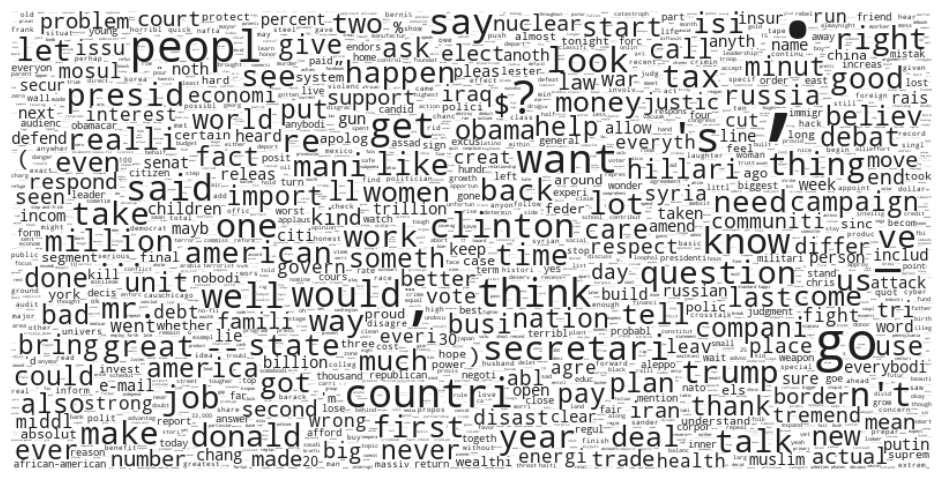

Reddit:


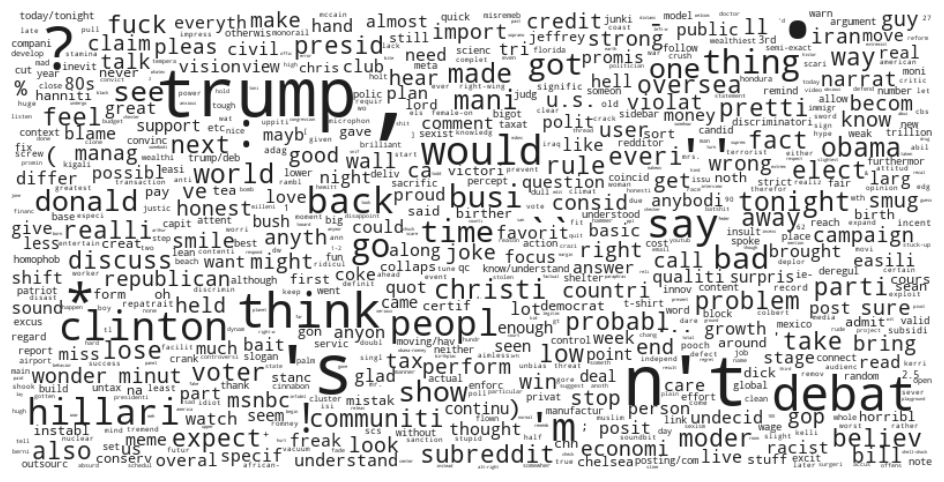

TV:


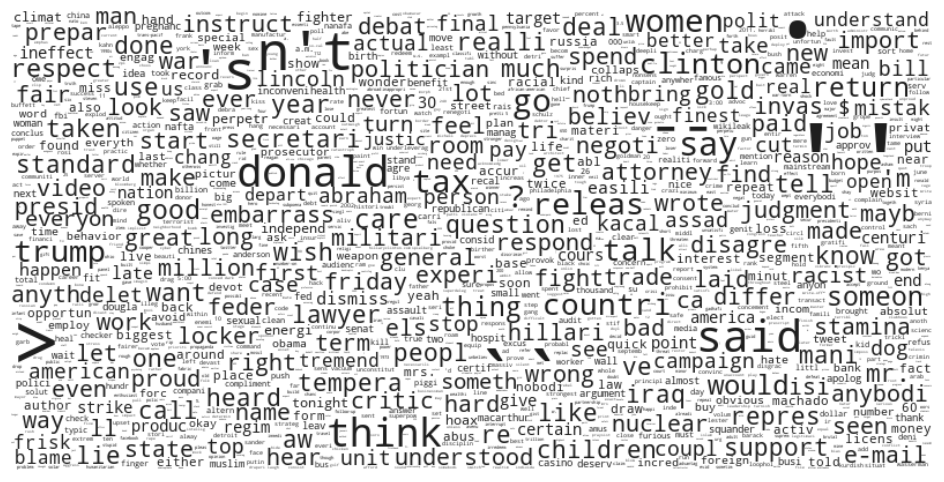

In [21]:
from utils import create_word_cloud

# CODE SUBMISSION ANSWER HERE (Double click to edit)
from collections import Counter

def get_frenquency(data: list) -> dict:
    return dict(Counter(data))
   

create_word_cloud(get_frenquency(stems_debate), "Debate")
create_word_cloud(get_frenquency(stems_reddit), "Reddit")
create_word_cloud(get_frenquency(stems_tv), "TV")


## Task 4 - Zipf's Law (5 P):

In the lecture, you have heard about Zipf’s law. 

### Part 1

State Zipf's law

Zipf's law is a statistical distribution that states that the frequency of a word in a corpus is inversely proportional to its rank in the frequency table, meaning that a few words occur very frequently, while many others occur rarely. The formula for Zipf's law is: f(r) = k/r, where f(r) is the frequency of the word at rank r, and k is a constant that depends on the corpus.

### Part 2

Check if Zipf's law (approximately) holds for our three datasets after all preprocessing steps.

For this, plot Zipf's law and the word distribution for each of the datasets.

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [25]:
frequency_debate = get_frenquency(stems_debate)
frequency_reddit = get_frenquency(stems_reddit)
frequency_tv = get_frenquency(stems_tv)

In [26]:
# CODE SUBMISSION ANSWER HERE (Double click to edit)

def create_zipfs_plot(frequency: dict):
    rank = 1
    column_header = ['Rank', 'Frequency', 'Frequency * Rank']
    df = pd.DataFrame( columns = column_header )
    collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

    for word , freq in collection:
        df.loc[word] = [rank, freq, rank*freq]
        rank = rank + 1
        
    plt.figure(figsize=(10,10)) 
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.xticks(rotation=90)    

    for word , freq in collection[:30]:
        plt.bar(word, freq)    
    plt.show()

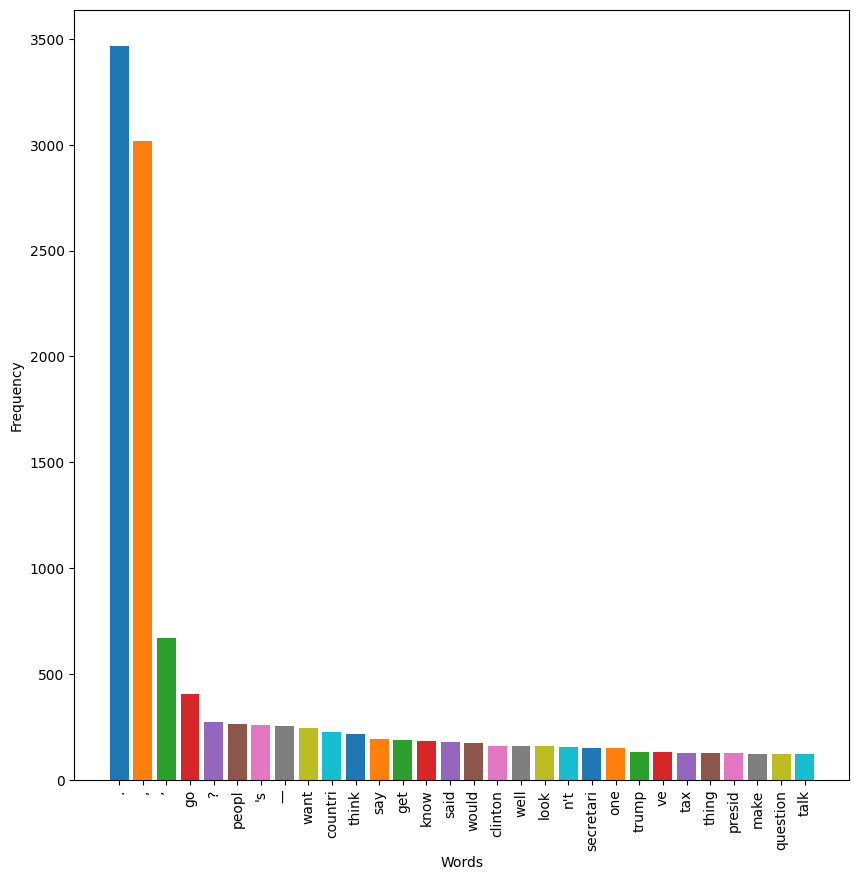

In [27]:
create_zipfs_plot(frequency_debate)

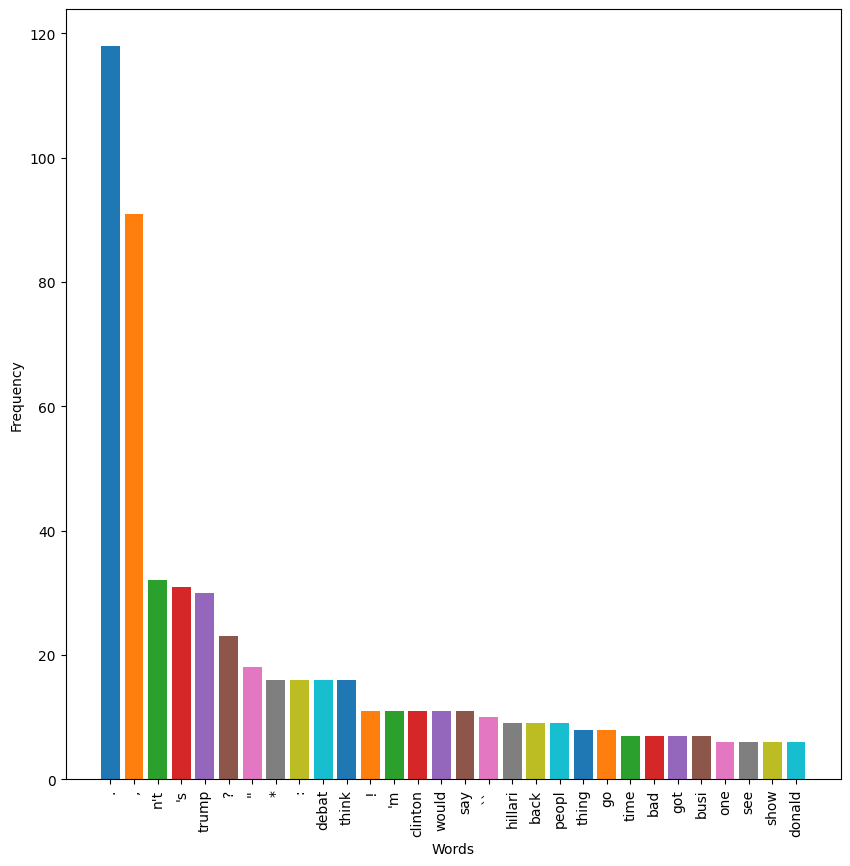

In [28]:
create_zipfs_plot(frequency_reddit)

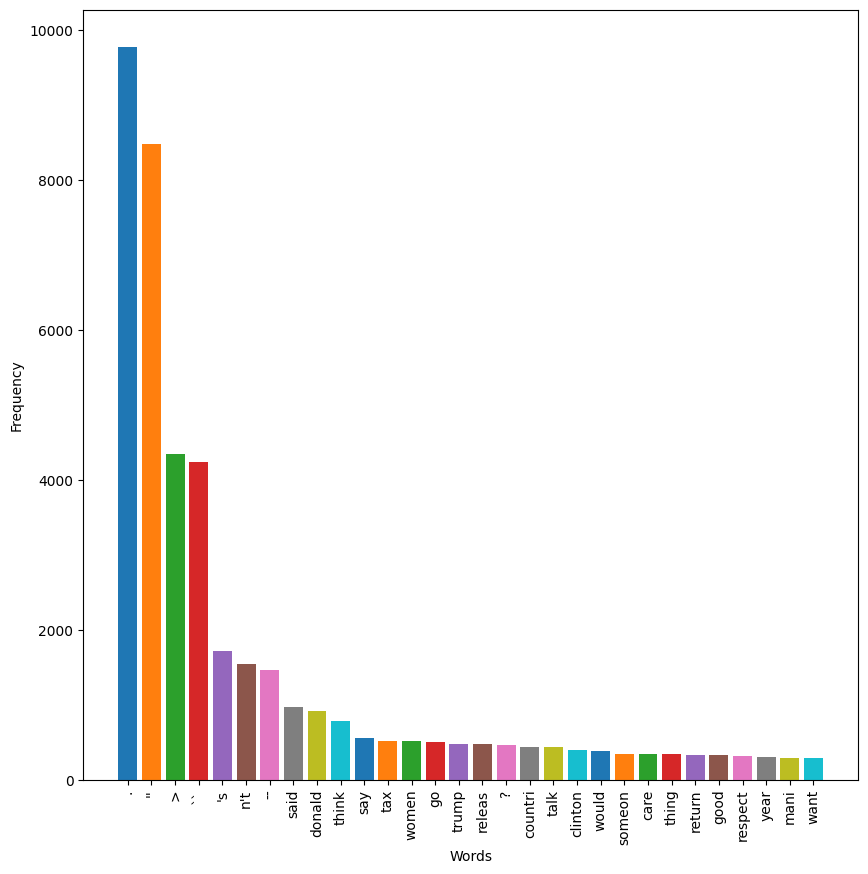

In [29]:
create_zipfs_plot(frequency_tv)

### Part 3

Describe your plots and discuss your findings.

Because we did not remove the punctuation in the 3 diffrent datasets the most frequent tokens are all punctuation. Also the splitting of words like "can't" in to "ca" and "n't" isn't particually helpful. The curves are still relativly close to the what zipfs law states, a few words are high-frequency, but most of the are low frequency.

---

#### Submitting your results:

To submit your results, please:

- save this file, i.e., `ex??_assignment.ipynb`.
- if you reference any external files (e.g., images), please create a zip or rar archieve and put the notebook files and all referenced files in there.
- login to ILIAS and submit the `*.ipynb` or archive for the corresponding assignment.

**Remarks:**
    
- Do not copy any code from the Internet. In case you want to use publicly available code, please, add the reference to the respective code snippet.
- Check your code compiles and executes, even after you have restarted the Kernel.
- Submit your written solutions and the coding exercises within the provided spaces and not otherwise.
- Write the names of your partner and your name in the top section.